### Reproducible Model Training

1. Build a model that is predicting the creditworthiness of applicants. Make us of the pre-processed German Credit Data from the last assignment (german_processed.csv). Use a modified processing script from the last assignment to process the South German Credit Data Set2. After that, make use of this processed data to build your model.

2. Optimize your model, until you are satisfied.

In [180]:
import pandas as pd
import numpy as np

In [181]:
df = pd.read_csv("data.csv")

In [182]:
df.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1


Drop the first row

In [183]:
df.drop(0, axis = 0, inplace = True)

In [184]:
df.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
5,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [185]:
df.columns

Index(['checking account', 'duration in month', 'credit history',
       'credit purpose', 'credit amount', 'savings account',
       'employment since..', 'installment rate', 'status : sex',
       'other debtors / guarantors', 'residence since', 'property',
       'relationship : age', 'other installment plans', 'housing',
       'existing credits', 'job', 'people to provide maintenance for',
       'telephone', 'foreign worker', 'goodness'],
      dtype='object')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   checking account                   1000 non-null   object
 1   duration in month                  1000 non-null   object
 2   credit history                     1000 non-null   object
 3   credit purpose                     1000 non-null   object
 4   credit amount                      1000 non-null   object
 5   savings account                    1000 non-null   object
 6   employment since..                 1000 non-null   object
 7   installment rate                   1000 non-null   object
 8   status : sex                       1000 non-null   object
 9   other debtors / guarantors         1000 non-null   object
 10  residence since                    1000 non-null   object
 11  property                           1000 non-null   object
 12  relati

In [187]:
df = df.apply(pd.to_numeric)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   checking account                   1000 non-null   int64
 1   duration in month                  1000 non-null   int64
 2   credit history                     1000 non-null   int64
 3   credit purpose                     1000 non-null   int64
 4   credit amount                      1000 non-null   int64
 5   savings account                    1000 non-null   int64
 6   employment since..                 1000 non-null   int64
 7   installment rate                   1000 non-null   int64
 8   status : sex                       1000 non-null   int64
 9   other debtors / guarantors         1000 non-null   int64
 10  residence since                    1000 non-null   int64
 11  property                           1000 non-null   int64
 12  relationship : age  

### Model Optimization

### Target class

In [189]:
df["goodness"].value_counts()

1    700
0    300
Name: goodness, dtype: int64

### Splitting into data and target class

In [190]:
X = df.drop(["goodness"], axis = 1)
Y = df["goodness"].values

In [191]:
Y.shape

(1000,)

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler().fit(X)
X_scaler = scaler.fit_transform(X)

In [194]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid

In [195]:
models = {"lr" : LogisticRegression(),
          "dt" : DecisionTreeClassifier(),
          "knn" : KNeighborsClassifier(),
          "nb" : GaussianNB(),
          "lda" : LinearDiscriminantAnalysis(),
          "svm" : SVC()}

In [196]:
scoring = "accuracy"

In [197]:
best_models = []

In [198]:
hyperparams = {"lr": {"C": [0.01, 0.1, 1, 2, 10, 100], "penalty": ["l1","l2"], "max_iter": [8000, 15000]},
               "dt": {"max_depth": [2, 3, 5, 10, 20], "min_samples_leaf": [5, 10, 20, 50, 100], "criterion": ["gini", "entropy"]},
               "knn": {"n_neighbors": range(1, 31)},
               "nb": {'var_smoothing': np.logspace(0,-9, num=100)},
               "lda": {"solver": ['svd', 'lsqr', 'eigen']},
               "svm": {"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001], "kernel": ["rbf"]}}

In [199]:
for name, model in models.items():
    skf = StratifiedKFold(n_splits = 10)
    #cv_results = cross_val_score(model, X, Y, cv = skf, scoring = "precision")
    clf = GridSearchCV(model, param_grid = hyperparams[name], scoring = "accuracy", cv = skf)
    clf.fit(X, Y)
    print("best score is {} with params {}".format(clf.best_score_, clf.best_params_ ))
    best_models.append((name, clf.best_score_, clf.best_params_))
    #names.append(name)
    #results.append(cv_results)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_v

best score is 0.745 with params {'C': 10, 'max_iter': 8000, 'penalty': 'l2'}
best score is 0.744 with params {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
best score is 0.704 with params {'n_neighbors': 25}
best score is 0.74 with params {'var_smoothing': 2.848035868435799e-08}
best score is 0.739 with params {'solver': 'svd'}
best score is 0.7 with params {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [200]:
best_models

[('lr', 0.745, {'C': 10, 'max_iter': 8000, 'penalty': 'l2'}),
 ('dt', 0.744, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}),
 ('knn', 0.704, {'n_neighbors': 25}),
 ('nb', 0.74, {'var_smoothing': 2.848035868435799e-08}),
 ('lda', 0.739, {'solver': 'svd'}),
 ('svm', 0.7, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'})]

##### The optimized model in this case is Logistic Regression that got the Accuracy of 74.7% which is maximum among other tested models. These results are calculated using 10-Fold Cross Validation with Hyperparameter Tuning.

### Reproduceability

As we can see the ordinal values are not applicable in this scenario, so we need to convert them into binary values using one-hot encoding.

In [201]:
dict_values= {'credit purpose':     {0: 'others', 1: 'car (new)',2 : 'car (used)',3 : 'furniture/equipment',4 : 'radio/television',5: 'domestic appliances',6:'repairs',7:'education',8:'vacation',9:'retraining',10:'business'},
             'employment since..': {1: 'unemployed',2:'<1 yr',3: '1-3 yrs',4 :'4-6 yrs',5: '>= 7 yrs'},
             'status : sex':       {1: 'male : divorced/separated',2: 'female: non-single or male: single',3: 'male : married/widowed',4: 'female : single'},
             'other debtors / guarantors': { 1 : 'none', 2: 'co-applicant',3 : 'guarantor'},
             'property':           {1: 'unknown / no property',2 : 'car or other',3 : 'building soc. savings agr./life insurance',4 : 'real estate'},
             'other installment plans': {1 : 'bank',2 : 'stores',3 : 'none'},
             'housing':            {1: 'for free', 2 : 'rent',3 : 'own'},
             'job':                {1: 'unemployed/unskilled - non-resident',2 : 'unskilled - resident',3 : 'skilled employee/official',4 : 'manager/self-empl./highly qualif'},
             'people to provide maintenance for': {1 : 0,2 : 1},
             'telephone':          {1: 0, 2:1},
             'foreign worker':     {1:1,2:0},
             }

In [202]:
df = df.replace(dict_values)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   checking account                   1000 non-null   int64 
 1   duration in month                  1000 non-null   int64 
 2   credit history                     1000 non-null   int64 
 3   credit purpose                     1000 non-null   object
 4   credit amount                      1000 non-null   int64 
 5   savings account                    1000 non-null   int64 
 6   employment since..                 1000 non-null   object
 7   installment rate                   1000 non-null   int64 
 8   status : sex                       1000 non-null   object
 9   other debtors / guarantors         1000 non-null   object
 10  residence since                    1000 non-null   int64 
 11  property                           1000 non-null   object
 12  relati

In [204]:
df = pd.get_dummies(df)

In [205]:
X = df.drop(["goodness"], axis = 1)
Y = df["goodness"].values

In [206]:
df.head()

,checking account,duration in month,credit history,credit amount,savings account,installment rate,residence since,relationship : age,existing credits,people to provide maintenance for,...,other installment plans_bank,other installment plans_none,other installment plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
1,1,18,4,1049,1,4,4,21,1,1,...,0,1,0,1,0,0,0,1,0,0
2,1,9,4,2799,1,2,2,36,2,0,...,0,1,0,1,0,0,0,1,0,0
3,2,12,2,841,2,2,4,23,1,1,...,0,1,0,1,0,0,0,0,0,1
4,1,12,4,2122,1,3,2,39,2,0,...,0,1,0,1,0,0,0,0,0,1
5,1,12,4,2171,1,4,4,38,2,1,...,1,0,0,0,0,1,0,0,0,1


In [207]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 48 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   checking account                                    1000 non-null   int64
 1   duration in month                                   1000 non-null   int64
 2   credit history                                      1000 non-null   int64
 3   credit amount                                       1000 non-null   int64
 4   savings account                                     1000 non-null   int64
 5   installment rate                                    1000 non-null   int64
 6   residence since                                     1000 non-null   int64
 7   relationship : age                                  1000 non-null   int64
 8   existing credits                                    1000 non-null   int64
 9   people to provide m

In [208]:
best_models[0][2]

{'C': 10, 'max_iter': 8000, 'penalty': 'l2'}

In [209]:
names = []
results = []

In [210]:
scoring = "accuracy"
models = {"Logistic Regression": LogisticRegression(C = 100, max_iter = 8000, penalty = "l2")}
for name, model in models.items():
    skf = StratifiedKFold(n_splits = 10)
    #cv_results = cross_validate(model, X, Y, cv = skf, scoring = scoring)
    cv_results = cross_val_score(model, X, Y, cv = skf, scoring = scoring)
    names.append(name)
    results.append(cv_results)

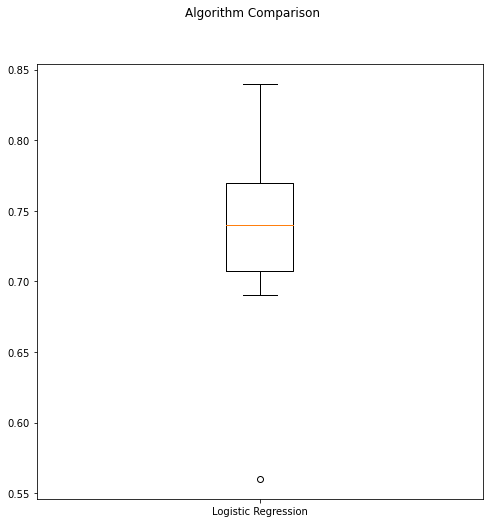

In [211]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (8, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [213]:
lr = LogisticRegression(C = 100, max_iter = 8000, penalty = "l2")

In [214]:
lr.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=8000)

In [215]:
coef = lr.coef_

In [216]:
coef.shape

(1, 48)

In [217]:
X.shape

(1000, 48)

In [218]:
protected_attributes = X.columns[27:31]

In [219]:
coefficients = coef[0][27:31]
coefficients

array([ 0.07323822, -0.24404406, -0.20236771,  0.34662718])

In [220]:
table = {"Attributes": protected_attributes,
         "Coefficients": coefficients}

In [221]:
table

{'Attributes': Index(['status : sex_female : single',
        'status : sex_female: non-single or male: single',
        'status : sex_male : divorced/separated',
        'status : sex_male : married/widowed'],
       dtype='object'),
 'Coefficients': array([ 0.07323822, -0.24404406, -0.20236771,  0.34662718])}

In [222]:
table = pd.DataFrame(table)

In [223]:
table

,Attributes,Coefficients
0,status : sex_female : single,0.073238
1,status : sex_female: non-single or male: single,-0.244044
2,status : sex_male : divorced/separated,-0.202368
3,status : sex_male : married/widowed,0.346627


It can be observed that the Model is bisaed towards Male Applicant's of Loan. So we should not include such attributes that are biased in terms of gender and race marital status.